In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\Paras\Desktop\parasonly\ML Projects\data\CustomerChurn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [4]:
# converting the TotalCharges from categorical to numerical
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

In [5]:
data['IsLongTermContract'] = data['Contract'].apply(lambda x: 1 if x == 'Two year' else 0)

### Exploratory Data Analysis

In [6]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### 1. Churn Distribution

C:\Users\Paras\AppData\Local\Temp\ipykernel_26712\3762116981.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Churn'], data=data, palette='Set1')


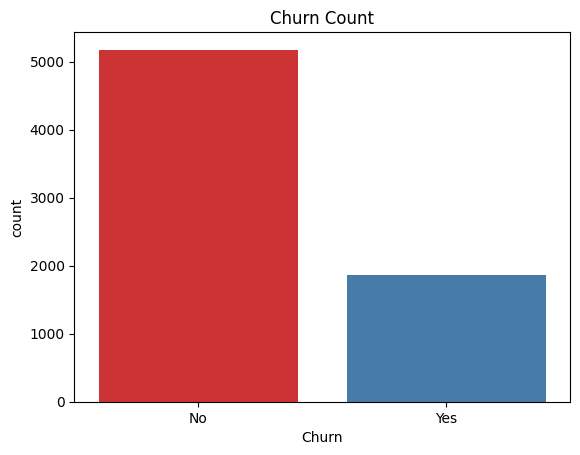

In [7]:
sns.countplot(x=data['Churn'], data=data, palette='Set1')
plt.title('Churn Count')
plt.show()

- The dataset shows an **imbalanced class distribution** where a significant portion of customers have not churned, while a smaller subset has churned.
- This imbalance should be addressed during model building (using techniques like SMOTE, class weights, or stratified sampling).

### 2. Contract Type vs Churn

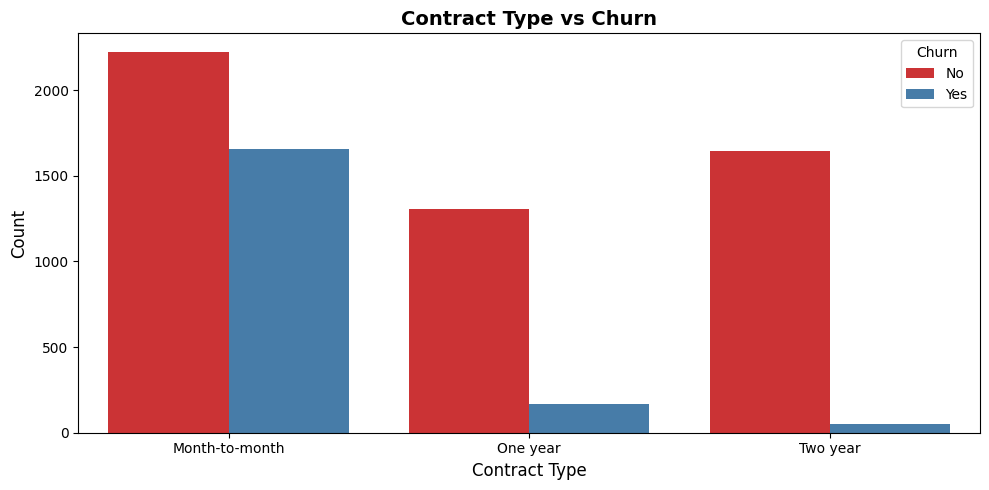

In [8]:
# Contract vs Churn
plt.figure(figsize=(10, 5))

# Multiple bar chart for Contract vs Churn
sns.countplot(x='Contract', hue='Churn', data=data, palette='Set1')
plt.title('Contract Type vs Churn', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

- From this graph, it is clear that customers having month-to-month or short term contracts are at a high risk of getting churned. 
- Customers without long-term contracts are high-risk and should be targeted for retention strategies.

### 3. Tenure Distribution by Churn

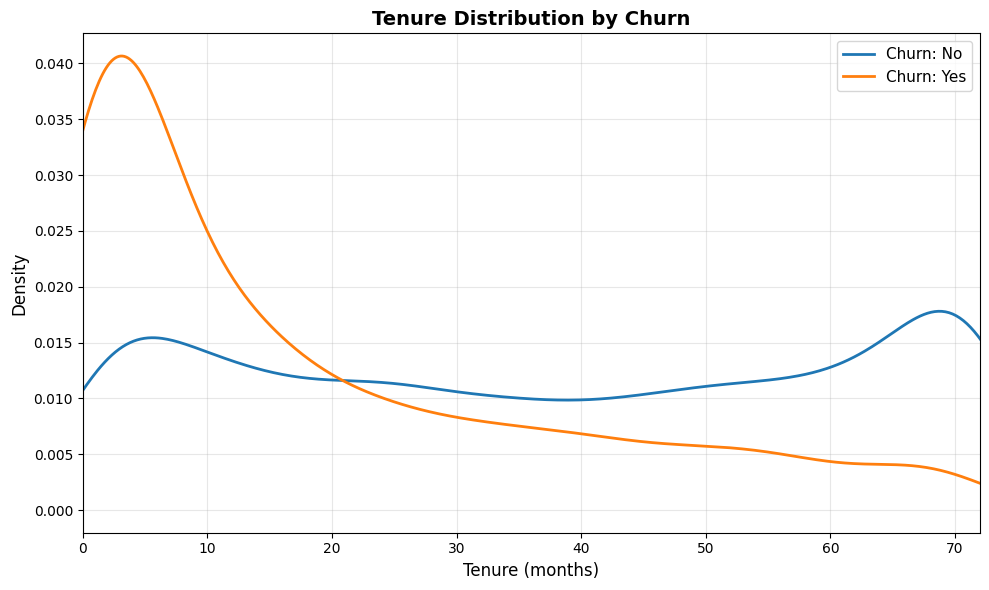

In [9]:
# Tenure Distribution by Churn - KDE Plot
plt.figure(figsize=(10, 6))

# Plot KDE for each churn group
for churn_value in data['Churn'].unique():
    data[data['Churn'] == churn_value]['tenure'].plot(kind='kde', label=f'Churn: {churn_value}', linewidth=2)

plt.title('Tenure Distribution by Churn', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (months)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(0, data['tenure'].max())
plt.tight_layout()
plt.show()

- **Churned customers** (Yes) show a peak at lower tenure values, indicating customers are most likely to churn early in their relationship.
- **Non-churned customers** (No) show a more spread-out distribution with higher density at longer tenure periods.
- Customers with **0-6 months tenure** are at critical risk of churning - this is the most important window for intervention.
- Customers who survive the first few months are significantly more likely to remain loyal.


### 4. Correlation of TotalCharges and tenure

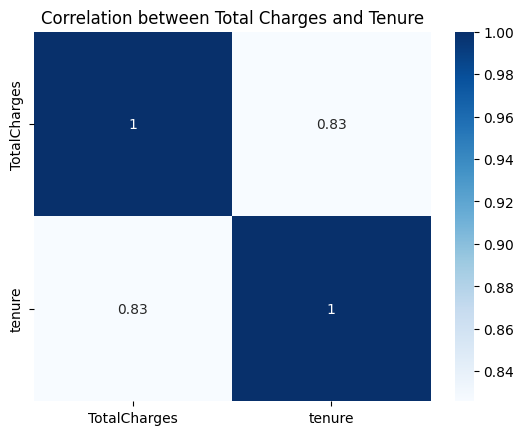

In [11]:
corr = data[['TotalCharges','tenure']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation between Total Charges and Tenure')
plt.show()

#### The tenure and TotalCharges columns are highly correlated.